In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import re
import json

In [3]:
with open('li2.json','r') as fp:
    li2 = json.load(fp)

In [4]:
#li2 is tokenized and cleaned version of words of the sentences

In [5]:
li2[0]

['know',
 'listenin',
 'bad',
 'habit',
 'earlier',
 'start',
 'freakin',
 'part',
 '=[']

In [6]:
li2s = pd.Series(li2)
dup = li2s[li2s.duplicated()]
dup

198      [umm, yeah, that's, probably, pretty, good, no...
220                                                     []
305                                                     []
366                                 [feel, deflate, doggy]
420                  [airport, didnt, show, tonight, homo]
                               ...                        
39921                                                   []
39926                                                   []
39945                          [happy, mother's, day, mom]
39970                                    [happy, birthday]
39995                                                   []
Length: 2026, dtype: object

In [7]:
len(dup) # duplicated data

2026

In [8]:
li2s.value_counts()

[]                                                                                                              686
[thanks]                                                                                                         64
[happy, mother's, day]                                                                                           50
[happy, mother, day]                                                                                             47
[thank]                                                                                                          40
                                                                                                               ... 
[work, ..., suppose, day, much, work, get, do, plm, world, ..., sigh]                                             1
[take, 40, underpriveledged, kid, circus, 2moro, big, day, plan, still, aint, feel, 100, nervous, right, ..]      1
[plus, guy, icetv, really, miss, live]                                  

In [9]:
dupi = dup.index
dupi

Index([  198,   220,   305,   366,   420,   450,   485,   521,   550,   598,
       ...
       39898, 39901, 39908, 39913, 39915, 39921, 39926, 39945, 39970, 39995],
      dtype='int64', length=2026)

In [10]:
df = pd.read_csv('data/tweet_emotions.csv')

In [11]:
finali = []
for i in range(len(df)):
    if(i not in dupi):
        finali.append(i)
emotion = df['sentiment'][finali]

In [12]:
len(emotion)

37974

In [13]:
li2ss = li2s.drop_duplicates()
len(li2ss)

37974

In [14]:
li2ss.value_counts()

[know, listenin, bad, habit, earlier, start, freakin, part, =[]                                                   1
[look, like, sun, make, comeback, midwest, happy, monday]                                                         1
[yeah, fff.at, lab, come, super, duper, iphone, real, scratching, app]                                            1
[try, fireflight, first, ..., female, fronted, metal, awesome, .., .., unbreakable, album, would, good, start]    1
[tell, facebook, minus, everything, status, update]                                                               1
                                                                                                                 ..
[ree-heally, hop, rain, stop, time, get, metro, courthouse, bring, umbrella, today]                               1
[might, snob, friend-follower, ratio, 6]                                                                          1
[bore, cleanin, house]                                                  

In [15]:
# all the duplicates has been removed

In [16]:
oo = pd.DataFrame(list(li2ss))
oo['emotion']=emotion
oo

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,emotion
0,know,listenin,bad,habit,earlier,start,freakin,part,=[,None,...,None,None,None,None,None,None,None,None,None,empty
1,layin,n,bed,headache,ughhh,...,waitin,call,...,None,...,None,None,None,None,None,None,None,None,None,sadness
2,funeral,ceremony,...,gloomy,friday,...,None,None,None,None,...,None,None,None,None,None,None,None,None,None,sadness
3,want,hang,friend,soon,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,enthusiasm
4,want,trade,someone,houston,ticket,one,None,None,None,None,...,None,None,None,None,None,None,None,None,None,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37969,succesfully,follow,tayla,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,surprise
37970,happy,mother,day,love,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,relief
37971,happy,mother's,day,mommy,woman,man,long,momma,someone,day,...,None,None,None,None,None,None,None,None,None,fun
37972,wassup,beautiful,follow,peep,new,hit,single,www.myspace.com/ipsohot,def,wat,...,None,None,None,None,None,None,None,None,None,NaN


In [17]:
oo['emotion']=oo['emotion'].fillna('happy')

In [18]:
oo

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,emotion
0,know,listenin,bad,habit,earlier,start,freakin,part,=[,None,...,None,None,None,None,None,None,None,None,None,empty
1,layin,n,bed,headache,ughhh,...,waitin,call,...,None,...,None,None,None,None,None,None,None,None,None,sadness
2,funeral,ceremony,...,gloomy,friday,...,None,None,None,None,...,None,None,None,None,None,None,None,None,None,sadness
3,want,hang,friend,soon,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,enthusiasm
4,want,trade,someone,houston,ticket,one,None,None,None,None,...,None,None,None,None,None,None,None,None,None,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37969,succesfully,follow,tayla,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,surprise
37970,happy,mother,day,love,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,relief
37971,happy,mother's,day,mommy,woman,man,long,momma,someone,day,...,None,None,None,None,None,None,None,None,None,fun
37972,wassup,beautiful,follow,peep,new,hit,single,www.myspace.com/ipsohot,def,wat,...,None,None,None,None,None,None,None,None,None,happy


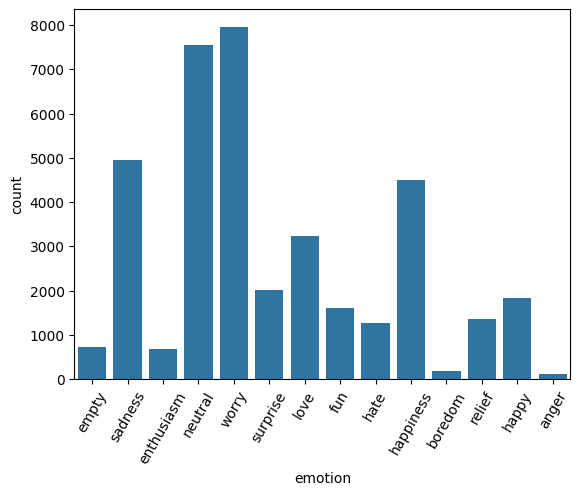

In [19]:
sns.countplot(x = oo['emotion'])
plt.xticks(rotation=60)
plt.show()

In [20]:
ool = oo.iloc[:,:-1]
ool

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,know,listenin,bad,habit,earlier,start,freakin,part,=[,None,...,None,None,None,None,None,None,None,None,None,None
1,layin,n,bed,headache,ughhh,...,waitin,call,...,None,...,None,None,None,None,None,None,None,None,None,None
2,funeral,ceremony,...,gloomy,friday,...,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,want,hang,friend,soon,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,want,trade,someone,houston,ticket,one,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37969,succesfully,follow,tayla,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
37970,happy,mother,day,love,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
37971,happy,mother's,day,mommy,woman,man,long,momma,someone,day,...,None,None,None,None,None,None,None,None,None,None
37972,wassup,beautiful,follow,peep,new,hit,single,www.myspace.com/ipsohot,def,wat,...,None,None,None,None,None,None,None,None,None,None


In [21]:
v = ool.values
v

array([['know', 'listenin', 'bad', ..., None, None, None],
       ['layin', 'n', 'bed', ..., None, None, None],
       ['funeral', 'ceremony', '...', ..., None, None, None],
       ...,
       ['happy', "mother's", 'day', ..., None, None, None],
       ['wassup', 'beautiful', 'follow', ..., None, None, None],
       ['bullet', 'train', 'tokyo', ..., None, None, None]], dtype=object)

In [22]:
vo =[]
for i in range(len(v)):
    vo.append((v[i][v[i]!=None]).tolist())

In [23]:
vo[0]

['know',
 'listenin',
 'bad',
 'habit',
 'earlier',
 'start',
 'freakin',
 'part',
 '=[']

In [24]:
seql = pd.Series([len(x) for x in vo])

In [25]:
quant = seql.quantile([0.25,0.50,0.98])
quant

0.25     4.0
0.50     7.0
0.98    17.0
dtype: float64

In [26]:
max_size = max(len(x) for x in vo)
max_size

49

In [27]:
# as we can the 98% of sequence lengths falls under 17, but max length is 49
# padding all the lengths to 33 will lead to redundancy 
# but padding only to the 17 lenth and truncating remaining tokens will also lead to loss of data

In [28]:
# so, we will try to padd the sequences to 17-19

### padding the sequences

In [29]:
padded_sequences =[]
for i in vo:
    if(18-len(i)<0):
        j = i[:18]
        padded_sequences.append(j)
    else:
        j = i + (['<null>']*(18-len(i)))
        padded_sequences.append(j)

In [30]:
len(padded_sequences)

37974

In [31]:
x = padded_sequences
y = oo['emotion']

In [32]:
unique_class = y.unique()
num_classes=len(unique_class)
num_classes

14

In [33]:
unique_class

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'happy',
       'anger'], dtype=object)

In [34]:
xx = np.array(x)
yy = y.values

In [35]:
xx.shape,yy.shape

((37974, 18), (37974,))

In [36]:
xx=xx.tolist()

In [37]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(xx)
xxt = tokenizer.texts_to_sequences(xx)

In [38]:
vocab_size = len(tokenizer.word_index)+1
vocab_size # so, we have vocab_size unique words in our all combined sequence

27789

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_int = le.fit_transform(yy)
y_int

array([ 2, 11, 11, ...,  4,  6, 13])

In [40]:
xxt = np.array(xxt)

In [41]:
xxt.shape,y_int.shape

((37974, 18), (37974,))

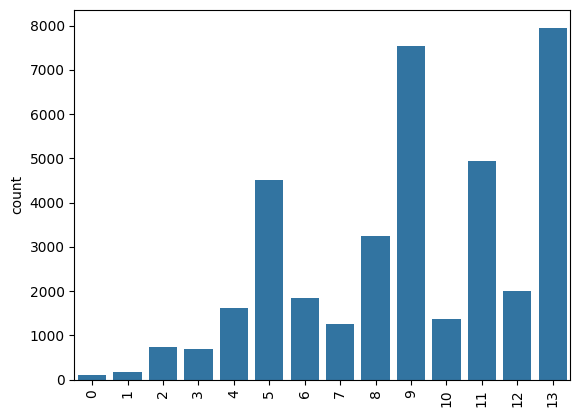

In [42]:
sns.countplot(x=y_int)
plt.xticks(rotation=90)
plt.show()

In [43]:
freq = pd.Series(y_int).value_counts()
freq

13    7956
9     7549
11    4950
5     4509
8     3235
12    2007
6     1841
4     1612
10    1365
7     1265
2      724
3      681
1      172
0      108
Name: count, dtype: int64

In [44]:
freqo ={}
frequ ={}
for i,j in enumerate(freq.items()):
    if(j[0]==0):
        freqo[freq.index[i]]=200
    if(j[0]==1):
        freqo[freq.index[i]]=500
    if(j[1]>4950):
        frequ[freq.index[i]]=5000
    if(j[1]>200 and j[1]<800):
        freqo[freq.index[i]]=1000 

freqo,frequ

({2: 1000, 3: 1000, 1: 500, 0: 200}, {13: 5000, 9: 5000})

In [45]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy=freqo, random_state=42)
x_res, y_res = oversample.fit_resample(xxt, y_int)

In [46]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy=frequ,random_state=42)
X_train_resampled, y_train_resampled = undersample.fit_resample(x_res, y_res)

In [47]:
X_train_resampled.shape,y_train_resampled.shape

((33484, 18), (33484,))

In [48]:
xxt.shape,y_int.shape

((37974, 18), (37974,))

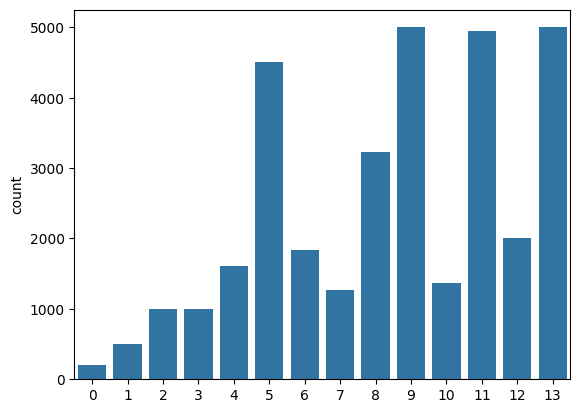

In [49]:
sns.countplot(x=y_train_resampled)
plt.show()

In [50]:
xs = pd.Series(X_train_resampled.tolist())
xd = xs[xs.duplicated()]
xd

108     [164, 48, 69, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...
109     [3, 186, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...
110     [101, 410, 260, 619, 3341, 1, 1, 1, 1, 1, 1, 1...
111     [28, 461, 626, 12410, 268, 1212, 9, 1, 1, 1, 1...
112     [176, 26745, 10707, 199, 10824, 1415, 687, 170...
                              ...                        
2695    [851, 3040, 4, 4, 24, 191, 361, 31, 452, 99, 4...
2696    [78, 256, 111, 2492, 2107, 1, 1, 1, 1, 1, 1, 1...
2697    [17, 452, 5853, 1923, 152, 138, 117, 43, 9, 90...
2698    [56, 4754, 14, 3, 38, 1, 1, 1, 1, 1, 1, 1, 1, ...
2699    [104, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...
Length: 1015, dtype: object

In [51]:
xd.value_counts().head(10)

[250, 258, 18, 1941, 2355, 584, 61, 16935, 654, 1, 1, 1, 1, 1, 1, 1, 1, 1]    8
[62, 85, 169, 91, 304, 1732, 1578, 705, 1312, 1, 1, 1, 1, 1, 1, 1, 1, 1]      6
[5005, 42, 191, 361, 1279, 268, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]           6
[16, 104, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]                     6
[185, 1668, 4242, 294, 14, 56, 1306, 88, 3, 5362, 1, 1, 1, 1, 1, 1, 1, 1]     6
[98, 6, 3589, 3006, 594, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]               5
[106, 738, 2, 167, 121, 6, 155, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]              5
[25, 840, 266, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]                   5
[228, 1269, 2, 68, 283, 1694, 72, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]            5
[2879, 775, 189, 2949, 6943, 1352, 2559, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]     5
Name: count, dtype: int64

In [52]:
from tensorflow.keras.utils import to_categorical
y_train_hot = to_categorical(y_train_resampled,num_classes=14) 

In [53]:
type(X_train_resampled),type(y_train_hot)

(numpy.ndarray, numpy.ndarray)

In [54]:
X_train_resampled.shape,y_train_hot.shape

((33484, 18), (33484, 14))

In [55]:
vo

[['know',
  'listenin',
  'bad',
  'habit',
  'earlier',
  'start',
  'freakin',
  'part',
  '=['],
 ['layin', 'n', 'bed', 'headache', 'ughhh', '...', 'waitin', 'call', '...'],
 ['funeral', 'ceremony', '...', 'gloomy', 'friday', '...'],
 ['want', 'hang', 'friend', 'soon'],
 ['want', 'trade', 'someone', 'houston', 'ticket', 'one'],
 ['re-pinging', 'go', 'prom', 'bc', 'bf', 'like', 'friend'],
 ['sleep',
  'im',
  'think',
  'old',
  'friend',
  'want',
  "he's",
  'marry',
  'damn',
  'want',
  '2',
  'scandalous'],
 ['hmmm'],
 ['charlene', 'love', 'miss'],
 ["i'm", 'sorry', 'least', 'friday'],
 ['cant', 'fall', 'asleep'],
 ['choke', 'retainer'],
 ['ugh', 'beat', 'stupid', 'song', 'get', 'next', 'rude'],
 ['u',
  'watch',
  'hill',
  'london',
  'u',
  'realise',
  'tourture',
  'week',
  'week',
  'late',
  'watch',
  'itonlinelol'],
 ['get', 'news'],
 ['storm', 'electricity', 'go'],
 ['agree'],
 ['sleepy', 'even', 'late', 'fail'],
 ['lady', 'gaga', 'tweet', 'impress', 'video', 'leaking

In [56]:
tokenizer.word_index.items()

dict_items([('<null>', 1), ('...', 2), ('get', 3), ('go', 4), ('day', 5), ("i'm", 6), ('good', 7), ('..', 8), ('work', 9), ('like', 10), ('love', 11), ('u', 12), ('today', 13), ('time', 14), ('think', 15), ('know', 16), ('one', 17), ('see', 18), ('lol', 19), ('make', 20), ('want', 21), ('back', 22), ('miss', 23), ('well', 24), ('really', 25), ('happy', 26), ('im', 27), ('feel', 28), ('night', 29), ("can't", 30), ('new', 31), ('home', 32), ('come', 33), ('need', 34), ('look', 35), ('oh', 36), ('still', 37), ('say', 38), ('2', 39), ('much', 40), ('thanks', 41), ('watch', 42), ('great', 43), ('last', 44), ('hope', 45), ('wish', 46), ('twitter', 47), ('morning', 48), ('take', 49), ('bad', 50), ('haha', 51), ('fun', 52), ('week', 53), ('sad', 54), ('sleep', 55), ('try', 56), ('tomorrow', 57), ('wait', 58), ('would', 59), ('thing', 60), ('tonight', 61), ('sorry', 62), ('right', 63), ("i'll", 64), ('friend', 65), ('nice', 66), ('though', 67), ('gonna', 68), ('way', 69), ("that's", 70), ('yeah

In [57]:
from gensim.models import Word2Vec

# Initialize and train the Word2Vec model
# Here, `size` is the embedding dimension, and `window` is the context window size
model = Word2Vec(sentences=vo, vector_size=200, window=5, min_count=1, workers=4)

# Save the model for later use
model.save("word2vec.model")

In [58]:
#sample
model = Word2Vec.load("word2vec.model")
word_vector = model.wv['sad']
word_vector

array([-0.16948003, -0.18966796,  0.08712495,  0.57407224,  0.7225791 ,
       -0.33495176,  0.3855362 ,  1.2396907 , -0.4890976 ,  0.5799084 ,
       -0.29190588, -0.6060413 , -0.23732105,  0.35877752, -0.10469072,
       -0.3015627 , -0.06297573,  0.3515523 ,  0.17566706, -0.9780825 ,
        0.57866067, -0.48407555,  0.04801541,  0.0178067 ,  0.38173735,
       -0.7899855 , -0.05807642, -0.06929844, -0.770422  ,  0.00708011,
        0.37446648,  0.20233747,  0.57128656, -0.16948004,  0.09117337,
        0.40491316,  0.6365306 , -0.4737645 , -0.1431297 , -0.53210205,
       -0.02442354, -0.27511436, -0.2400327 ,  0.2202675 ,  0.6793327 ,
       -0.33251742, -0.21354876, -0.1928373 ,  0.4156988 ,  0.27080894,
        0.26496744, -0.17423713, -0.12552403, -0.3676176 ,  0.20950328,
       -0.33186692,  0.33727795, -0.44100323, -0.48733425,  0.44533756,
       -0.73838973, -0.40326676, -0.21231692, -0.12293474, -0.9320871 ,
        0.17741533,  0.36564422,  0.8567149 , -0.9084092 ,  0.80

In [59]:
import random
embedding_matrix = np.zeros((vocab_size, 200))
model = Word2Vec.load("word2vec.model")
for i,ind in tokenizer.word_index.items():
    try:
        embedding_matrix[ind]=model.wv[i] 
    except:
        random_floats = np.random.normal(-8,8,200)
        embedding_matrix[ind]=random_floats
embedding_matrix 

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.63643715e+01,  2.09515995e-01, -1.07057594e+01, ...,
        -6.69759279e+00, -5.33215095e+00, -1.79137933e+01],
       [-1.34037971e-01, -3.04040223e-01, -8.54752436e-02, ...,
        -1.09911168e+00,  1.89066380e-01, -6.53001219e-02],
       ...,
       [ 3.91067518e-03, -9.23793577e-03, -1.75929652e-03, ...,
        -1.41745508e-02, -3.55042680e-03,  3.90106952e-03],
       [-4.48024459e-03, -6.30658120e-04, -6.67286012e-03, ...,
        -1.55221000e-02, -2.28027557e-03,  1.65248383e-03],
       [-1.33207673e-03, -2.45126290e-03, -1.44272181e-03, ...,
        -8.61220341e-03, -3.18887713e-03,  1.13547174e-03]])

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dropout,Bidirectional,Dense,LeakyReLU,GRU,GlobalAveragePooling1D,LayerNormalization,LSTM,Flatten,Conv1D,MaxPooling1D,BatchNormalization
from tensorflow.keras.regularizers import l1,l2

model = Sequential()
model.add(Embedding(input_dim=vocab_size,trainable=True,output_dim=200))

model.add(Bidirectional(GRU(64,return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(GRU(32,return_sequences=True)))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(128,kernel_regularizer=l2(0.05))) 
model.add(LeakyReLU(0.2))
model.add(Dropout(0.5))

model.add(Dense(64,kernel_regularizer=l2(0.05))) 
model.add(LeakyReLU(0.2))
model.add(Dropout(0.5))


model.add(Dense(num_classes,activation='softmax')) 

In [67]:
from tensorflow.keras.optimizers import Adam,SGD
model.compile(optimizer=Adam(learning_rate=1e-3),loss='categorical_crossentropy',metrics=['accuracy']) # categorical_crossentropy for one-hot encoded lables

In [68]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5,shuffle=True,random_state=42)
cn =1
val_accuracies=[]
for i,j in kf.split(X_train_resampled):
    print(f"fold {cn}")
    
    x_train,x_test = X_train_resampled[i],X_train_resampled[j]
    y_train,y_test = y_train_hot[i],y_train_hot[j]

    history = model.fit(x_train,y_train,epochs=10,batch_size=64,validation_data=(x_test,y_test)) 
    val_accuracy = history.history['val_accuracy'][-1]  # Accuracy from the last epoch
    val_accuracies.append(val_accuracy)
    cn+=1

fold 1
Epoch 1/10
419/419 ━━━━━━━━━━━━━━━━━━━━ 47s 89ms/step - accuracy: 0.1447 - loss: 5.9978 - val_accuracy: 0.1492 - val_loss: 2.3996
Epoch 2/10
419/419 ━━━━━━━━━━━━━━━━━━━━ 32s 77ms/step - accuracy: 0.1505 - loss: 2.3953 - val_accuracy: 0.1487 - val_loss: 2.3965
Epoch 3/10
419/419 ━━━━━━━━━━━━━━━━━━━━ 36s 87ms/step - accuracy: 0.1533 - loss: 2.3179 - val_accuracy: 0.1489 - val_loss: 2.4491
Epoch 4/10
419/419 ━━━━━━━━━━━━━━━━━━━━ 32s 76ms/step - accuracy: 0.1637 - loss: 2.2389 - val_accuracy: 0.1366 - val_loss: 2.5050
Epoch 5/10
419/419 ━━━━━━━━━━━━━━━━━━━━ 33s 77ms/step - accuracy: 0.1887 - loss: 2.1561 - val_accuracy: 0.1217 - val_loss: 2.6188
Epoch 6/10
419/419 ━━━━━━━━━━━━━━━━━━━━ 32s 77ms/step - accuracy: 0.2104 - loss: 2.0643 - val_accuracy: 0.1272 - val_loss: 2.7810
Epoch 7/10
419/419 ━━━━━━━━━━━━━━━━━━━━ 30s 73ms/step - accuracy: 0.2399 - loss: 1.9983 - val_accuracy: 0.1217 - val_loss: 2.7076
Epoch 8/10
419/419 ━━━━━━━━━━━━━━━━━━━━ 31s 75ms/step - accuracy: 0.2675 - loss: 1.

In [69]:
np.mean(val_accuracies)

0.47163553684949877

In [ ]:
np.mean(val_accuracies)

0.6258582264184952

### Hybrid sampling

In [404]:
# the word vectors in embedded matrix are also stored in the same order as word_index 

In [405]:
len(encoded)

35469

In [406]:
l1= len(Xtl)
l2 = len(xvl)
l1,l2

(20763, 7111)

In [407]:
ll = l1+l2
ll

27874

In [408]:
ll-l2 

20763

In [409]:
len(encoded)-ll # y_test length

7595

In [410]:
x_train_final = encoded[:l1]
x_val_final = encoded[l1:ll]

In [411]:
x_train_final = np.array(x_train_final)
x_val_final = np.array(x_val_final)

In [412]:
y_test,y_train_resampled_m,y_val_resampled_m

(array([ 9, 13,  2, ...,  9,  0, 10]),
 array([11,  9,  9, ...,  3,  1,  2], dtype=int64),
 array([ 8,  9, 13, ...,  3,  2,  3], dtype=int64))

In [423]:
from tensorflow.keras.utils import to_categorical
y_train_hot = to_categorical(y_train_resampled_m,num_classes=14) 
y_test_hot = to_categorical(y_test,num_classes=14) 
y_val_hot = to_categorical(y_val_resampled_m,num_classes=14)
y_train_hot.shape,y_val_hot.shape ,y_test_hot.shape

((20763, 14), (7111, 14), (7595, 14))

In [424]:
print(x_train_final.shape,y_train_hot.shape)
print(x_val_final.shape,y_val_hot.shape)
print(x_test.shape,y_test_hot.shape)

(20763, 18) (20763, 14)
(7111, 18) (7111, 14)
(7595, 18) (7595, 14)


In [425]:
x_train_final 

array([[   4,   80,   43, ...,    1,    1,    1],
       [  27,   46,   72, ...,    1,    1,    1],
       [  46,    7,   28, ...,    1,    1,    1],
       ...,
       [ 311,  377,  950, ...,    1,    1,    1],
       [ 777,  384, 7583, ...,    1,    1,    1],
       [ 128,    9,    1, ...,    1,    1,    1]])

In [426]:
# shuffle the data
from sklearn.utils import shuffle
x_train_final,y_train_hot = shuffle(x_train_final,y_train_hot,random_state=42)
x_val_final,y_val_hot = shuffle(x_val_final,y_val_hot,random_state=42)

In [427]:
x_train_final

array([[ 101,   59,  217, ...,    1,    1,    1],
       [ 409,  366,  298, ..., 1026,    1,    1],
       [   3,  159,   81, ...,    1,    1,    1],
       ...,
       [1186,   63,    1, ...,    1,    1,    1],
       [1479,    5, 4312, ...,    1,    1,    1],
       [ 570, 2484,   56, ...,    1,    1,    1]])

In [428]:
# Now all our data is ready and as well as the embedded matrix which is created by word2vec

In [429]:
"""
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced',classes= np.unique(y_train_resampled_m), y=y_train_resampled_m) 
class_weight_dict = dict(enumerate(class_weights))
class_weight_dict
"""

"\nfrom sklearn.utils.class_weight import compute_class_weight\nclass_weights = compute_class_weight('balanced',classes= np.unique(y_train_resampled_m), y=y_train_resampled_m) \nclass_weight_dict = dict(enumerate(class_weights))\nclass_weight_dict\n"

### DL model

In [436]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dropout,Bidirectional,Dense,LeakyReLU,GRU,GlobalAveragePooling1D,LayerNormalization,LSTM,Flatten,Conv1D,MaxPooling1D
from tensorflow.keras.regularizers import l1,l2

model = Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=200,input_length=18))


model.add(Conv1D(128, kernel_size=3, activation='relu', kernel_regularizer=l2(0.005)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

model.add(Bidirectional(GRU(64,return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(GRU(32,return_sequences=True)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128,kernel_regularizer=l2(0.05))) 
model.add(LeakyReLU(0.2)) # to avoid dead neurons
model.add(Dropout(0.5))

model.add(Dense(64,kernel_regularizer=l2(0.05))) 
model.add(LeakyReLU(0.2)) # to avoid dead neurons
model.add(Dropout(0.5))

model.add(Dense(num_classes,activation='softmax')) 

In [437]:
from tensorflow.keras.optimizers import Adam,SGD
model.compile(optimizer=Adam(learning_rate=1e-3),loss='categorical_crossentropy',metrics=['accuracy']) # categorical_crossentropy for one-hot encoded lables

In [ ]:
history = model.fit(x_train_final,y_train_hot,epochs=30,batch_size=64,validation_data=(x_val_final,y_val_hot)) 

Epoch 1/30


In [ ]:
# Layernormalization - Feautre wise normalization instead of batch wise 
# Keep values in standard range which increases the speed of computation 

In [624]:
type(history)

keras.src.callbacks.history.History

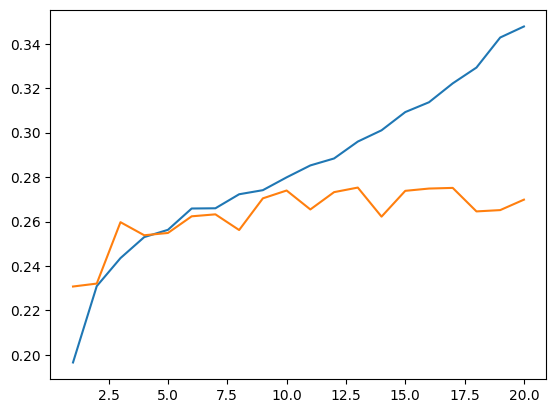

In [149]:
plt.plot([i for i in range(1,21)],history.history['accuracy'])
plt.plot([i for i in range(1,21)],history.history['val_accuracy'])
plt.show()

In [747]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_16 (Embedding)        │ (None, 18, 200)        │     5,400,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_12 (Conv1D)              │ (None, 16, 128)        │        76,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_12 (MaxPooling1D) │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_53 (Dropout)            │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_30                │ (None, 8, 128)         │        74,496 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_54 (Dropout)            │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_31                │ (None, 8, 64)          │        31,104 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_55 (Dropout)            │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 32)             │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_28 (LeakyReLU)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_56 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 13)             │           429 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,798,721 (64.08 MB)

 Trainable params: 5,599,573 (21.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,199,148 (42.72 MB)

In [1250]:
x_testt = tokenizer.texts_to_sequences(x_test.tolist())
x_testt = np.array(x_testt)

In [ ]:
# now evaluate on y_test (unseen data) (metrics: accuracy,precision,recall,f1-score)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

y_pred = model.predict(x_testt)

245/245 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step


In [1252]:
y_pred = np.argmax(y_pred,axis=1)
y_test = np.argmax(y_test_hot,axis=1)

In [1255]:
acc = accuracy_score(y_pred,y_test)
precision = precision_score(y_pred,y_test, average='weighted')
recall = recall_score(y_pred,y_test, average='weighted')
f1 = f1_score(y_pred,y_test,average='weighted')

c:\Users\vivek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [1256]:
acc,precision,recall,f1

(0.2827144686299616,
 0.40609347029478643,
 0.2827144686299616,
 0.3201039575042456)

In [ ]:
confusion_matrix(y_pred,y_test)